In [1]:
### P278 - P307 

### Projection and Manifold Learning 

In [1]:
# the larger the dimensions are, the greater the risk of overfitting 

In [2]:
### Projection 

# bed example: a Swiss roll 

### Manifold learning 

# a Swiss roll is a 2-d manifold rolled in 3-d space 

# PCA

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
### build a 3-d dataset 

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [4]:
### find the principal components 

X_centered = X - X.mean(axis=0)
U, s, V = np.linalg.svd(X_centered)
c1 = V.T[:, 0]
c2 = V.T[:, 1]

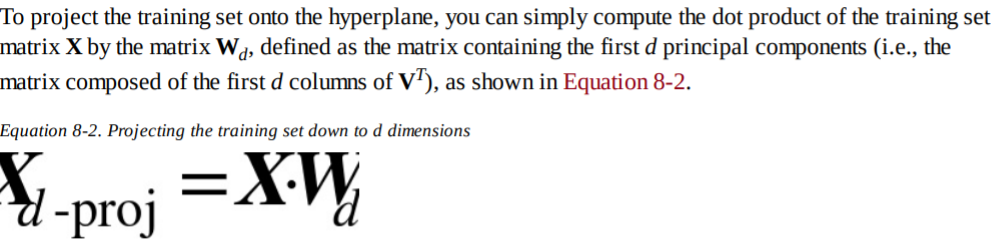

In [5]:
# project into first 2 pc 

W2 = V.T[:, :2]
X2D = X_centered.dot(W2)

In [6]:
# using sklearn 

from sklearn.decomposition import PCA 

pca = PCA(n_components = 2) 
X2D = pca.fit_transform(X)

In [7]:
pca.components_.T[:,0]

array([-0.93636116, -0.29854881, -0.18465208])

In [8]:
### Explained Variance Ratio 

print(pca.explained_variance_ratio_)

[0.84248607 0.14631839]


In [9]:
### Choosing the right number of dimensions 

# compute the min PC with 95% variance perserved

pca = PCA() 
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) +1 

In [12]:
# you can also set the n_components = "the ratio"

pca == PCA(n_components=0.95) 
X_reduced = pca.fit_transform(X)
print(X_reduced)

[[ 1.26203346  0.42067648  0.0138445 ]
 [-0.08001485 -0.35272239 -0.15436525]
 [ 1.17545763  0.36085729 -0.00722714]
 [ 0.89305601 -0.30862856  0.03418723]
 [ 0.73016287 -0.25404049  0.19736924]
 [-1.10436914  0.20204953  0.10140211]
 [ 1.27265808  0.46781247  0.16431061]
 [-0.44933007  0.67736663  0.02056169]
 [-1.09356195 -0.04467792  0.19288206]
 [-0.66177325 -0.28651264 -0.03876721]
 [ 1.04466138 -0.11244353 -0.0321141 ]
 [-1.05932502  0.31189109 -0.1202656 ]
 [ 1.13761426  0.14576655  0.02118536]
 [ 1.16044117  0.36481599  0.10723273]
 [-1.00167625  0.39422008 -0.05582805]
 [ 0.2750406  -0.34391089 -0.05156738]
 [-0.45624787  0.69707573 -0.02954594]
 [-0.79706574 -0.26870969 -0.04701266]
 [-0.66924929  0.65520024 -0.0432233 ]
 [ 1.30679728  0.37671343 -0.12148596]
 [-0.6626586  -0.32706423  0.11473492]
 [ 1.25387588  0.56043928 -0.17523509]
 [ 1.04046987 -0.08727672 -0.0957267 ]
 [ 1.26047729  0.1571074   0.03329202]
 [-1.09786649  0.38643428  0.10075862]
 [-0.7130973   0.64941523

### decompose the data 

In [15]:
# fetch data

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [16]:
# split the data 

from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
# find PC

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

d

154

Saving figure explained_variance_plot


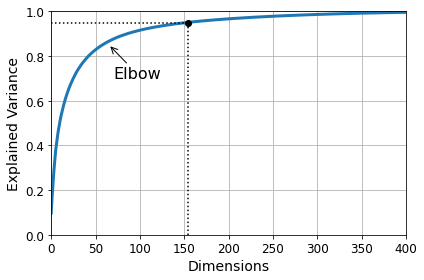

In [19]:
# plot the elbow 

plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
save_fig("explained_variance_plot")
plt.show()


In [20]:
# decompress the data 

pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

### Incremental PCA 

In [24]:
### using sklearn IncrementalPCA and partial_fit 

from sklearn.decomposition import IncrementalPCA 

n_batches = 100 
inc_pca = IncrementalPCA(n_components = 154) 
for X_batch in np.array_split(X, n_batches):
    inc_pca.partial_fit(X_batch) 
    
X_mnist_reduced = inc_pca.transform(X)

# could also use Numpy's memmap class 

In [ ]:
### Randomized PCA: to speed up the PCA

rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X)

# Kernel PCA

In [27]:
# often good at presering cluters 

In [31]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

from sklearn.decomposition import KernelPCA 

rbf_pca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 0.04)
X_reduced = rbf_pca.fit_transform(X)

Saving figure kernel_pca_plot


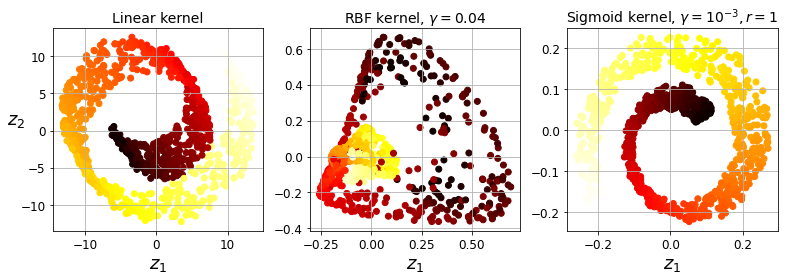

In [32]:
# plot the three kernel methods 

from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

save_fig("kernel_pca_plot")
plt.show()

### Selecting the Kernel

In [33]:
# reduce to 2-d 

# apply logistic reg 

# find best kernel params with grid search

In [34]:
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline 

clf = Pipeline([
    ("kpca", KernelPCA(n_components = 2)), 
    ("log_reg", LogisticRegression())
])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ['rbf', 'sigmoid']
}]

grid_search = GridSearchCV(clf, param_grid, cv = 3)
grid_search.fit(X,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [35]:
# check the best param 

print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


In [36]:
### use the reconstruction pre-image 

# KernelPCA(fit_inverse_transform = True)

### Loally Linear Embedding (LLE)

In [39]:

from sklearn.manifold import LocallyLinearEmbedding 

lle = LocallyLinearEmbedding(n_components = 2, n_neighbors = 10) 
X_reduced = lle.fit_transform(X)

# scale poorly on large dataset 

### Other Techniques

In [40]:
# multidimensional scaling 

# isomap 

# t-SNE 

# LDA 